##  

### Exploratory Data Analysis on Customer Attrition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import skew
from scipy.stats import kurtosis
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sns.set()

In [3]:
df=pd.read_csv('dataset/clean_data.csv')

In [4]:
df.head()

,CustomerId,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Surname,Geography,Gender,Age,Exited
0,15565701,1.0,0.0,0.0,9.0,698.0,161993.89,90212.38,Ferri,Central,Female,39.0,0.0
1,15565706,1.0,1.0,1.0,1.0,612.0,NaN,83256.26,Akobundu,Central,Male,35.0,1.0
2,15565714,2.0,0.0,1.0,1.0,601.0,64430.06,96517.97,Cattaneo,West,Male,47.0,0.0
3,15565779,1.0,1.0,0.0,6.0,627.0,57809.32,188258.49,Kent,East,Female,30.0,0.0
4,15565796,1.0,1.0,0.0,10.0,745.0,96048.55,74510.65,Docherty,East,Male,48.0,0.0


In [5]:
# data conatins 14 columns and 10,000 datapoints
df.shape

(10000, 13)

In [6]:
df.Gender.unique()

array(['Female', 'Male', 'Neutral'], dtype=object)

In [7]:
df.IsActiveMember.unique()

array([0., 1.])

In [8]:
#checking the missing values across columns

df.isnull().sum()

CustomerId            0
NumOfProducts         0
HasChckng             0
IsActiveMember        0
Tenure                0
CreditScore           3
Balance            3617
EstimatedSalary       0
Surname               0
Geography             0
Gender                0
Age                   0
Exited                0
dtype: int64

In [9]:
#checking how the data have been distributed (symmetrical or asymmetrical)
df.skew()

CustomerId         0.001149
NumOfProducts      0.745568
HasChckng         -0.901812
IsActiveMember    -0.060437
Tenure             0.071980
CreditScore       -0.074910
Balance            0.025624
EstimatedSalary    0.002085
Age                1.278170
Exited             1.471611
dtype: float64

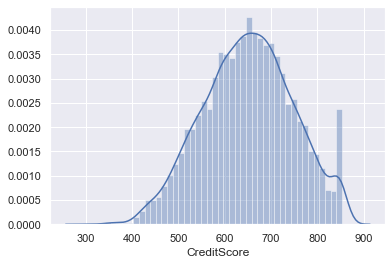

In [10]:
#CreditScore have 3 missing values within it and from below graph, it looks symmetrical with a skewness of -0.075

sns.distplot(df['CreditScore'])

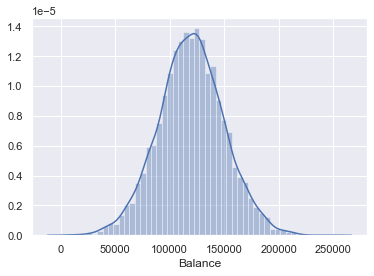

In [11]:
sns.distplot(df['Balance'])

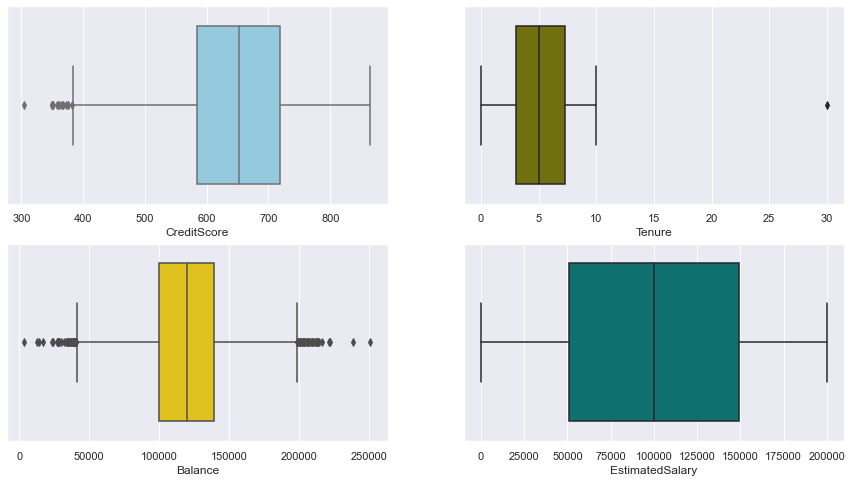

In [12]:
fig,axs = plt.subplots(2, 2, figsize=(15, 8))
sns.boxplot(data=df, x="CreditScore", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df, x="Tenure", color="olive", ax=axs[0, 1])
sns.boxplot(data=df, x="Balance", color="gold", ax=axs[1, 0])
sns.boxplot(data=df, x="EstimatedSalary", color="teal", ax=axs[1, 1])

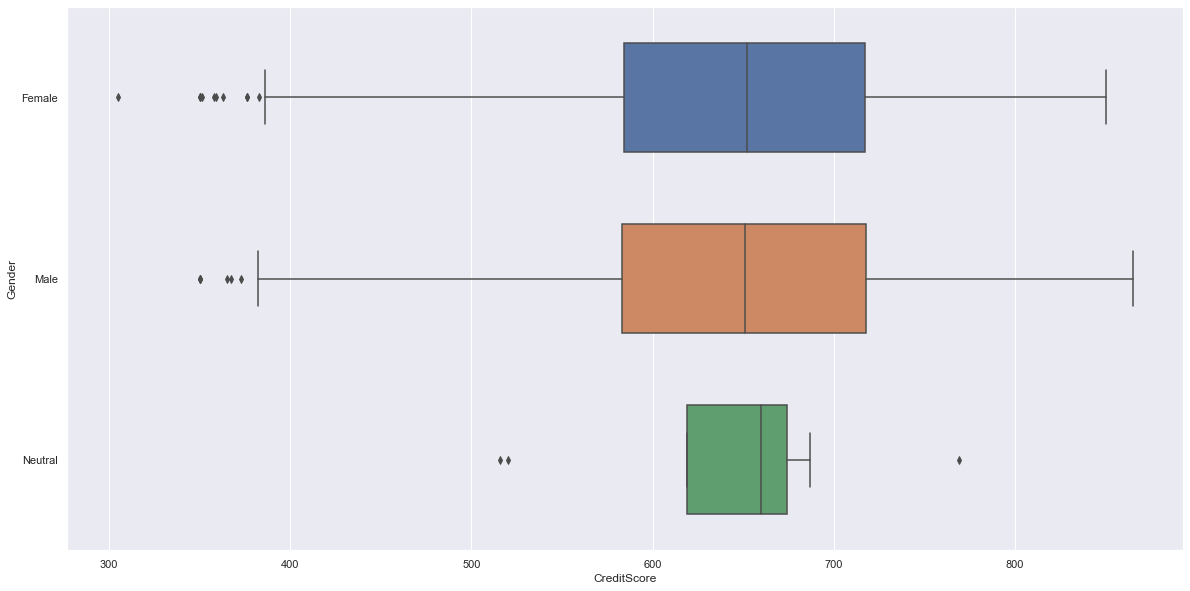

In [13]:
#Analysis distribution of credit score across genders

f = plt.figure(figsize=(20, 10))
sns.boxplot(x='CreditScore', y='Gender', data=df, orient="h", width=0.6)

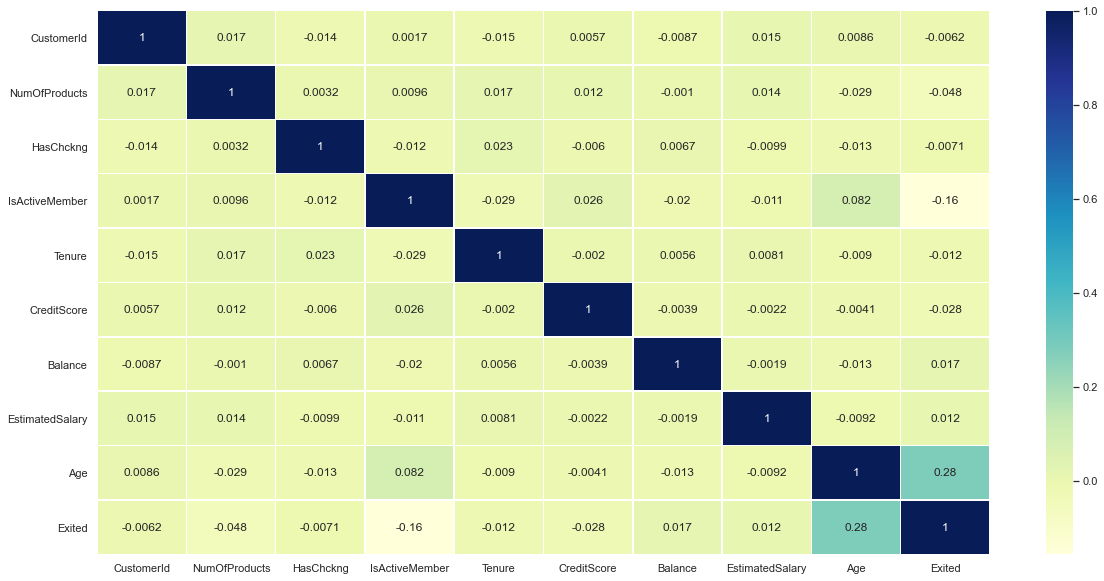

In [14]:
#Checking the collinearity between features

plt.figure(figsize = (20, 10))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True,linewidths = 0.5,)
plt.show()

From the statistical of overview of data, we found out that the data is almost symmetrical across columns except couple of features like age, HasChcng where skewness is not in range of [-0.5,0.5]

## Missing value imputation for CreditScore feature

Since the data spread for CreditScore is symmetrical with a skewness of -0.075, we will impute the missing values with it's mean

In [15]:
#First let's analyse the data with missing Credit Score

df_missing = df[df['CreditScore'].isna()]

In [16]:
df_missing

,CustomerId,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Surname,Geography,Gender,Age,Exited
1508,15604119,1.0,0.0,0.0,7.0,NaN,110349.82,126355.80,Alderete,Central,Male,35.0,0.0
3878,15662976,1.0,1.0,1.0,8.0,NaN,NaN,186062.36,Lettiere,Central,Male,37.0,0.0
6726,15733616,1.0,1.0,1.0,5.0,NaN,80613.93,142838.64,Sopuluchukwu,West,Male,40.0,0.0


## Imputing missing values with mean

In [17]:
#Using mean to impute the missing values
missing_col = ['CreditScore']
for i in missing_col:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

In [18]:
#checking the missing values after imputation
df.isnull().sum()

CustomerId            0
NumOfProducts         0
HasChckng             0
IsActiveMember        0
Tenure                0
CreditScore           0
Balance            3617
EstimatedSalary       0
Surname               0
Geography             0
Gender                0
Age                   0
Exited                0
dtype: int64

Till this step, we have handled the missing values and did a basic stat check for collinearity and spread of data across dataset.

### Analysis statistics on clients attrition rate

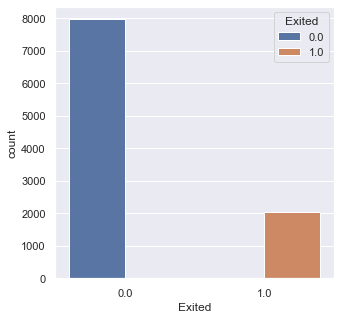

In [19]:
# count 
plt.figure(figsize = (5, 5))
sns.countplot(x="Exited",data=df, hue="Exited")

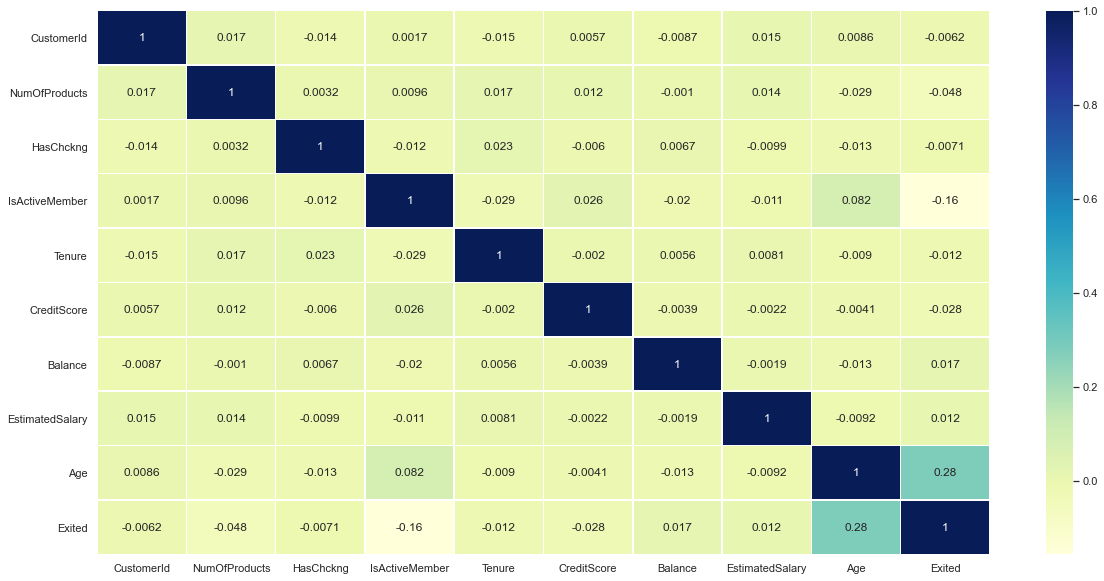

In [20]:
plt.figure(figsize = (20, 10))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True,linewidths = 0.5,)
plt.show()

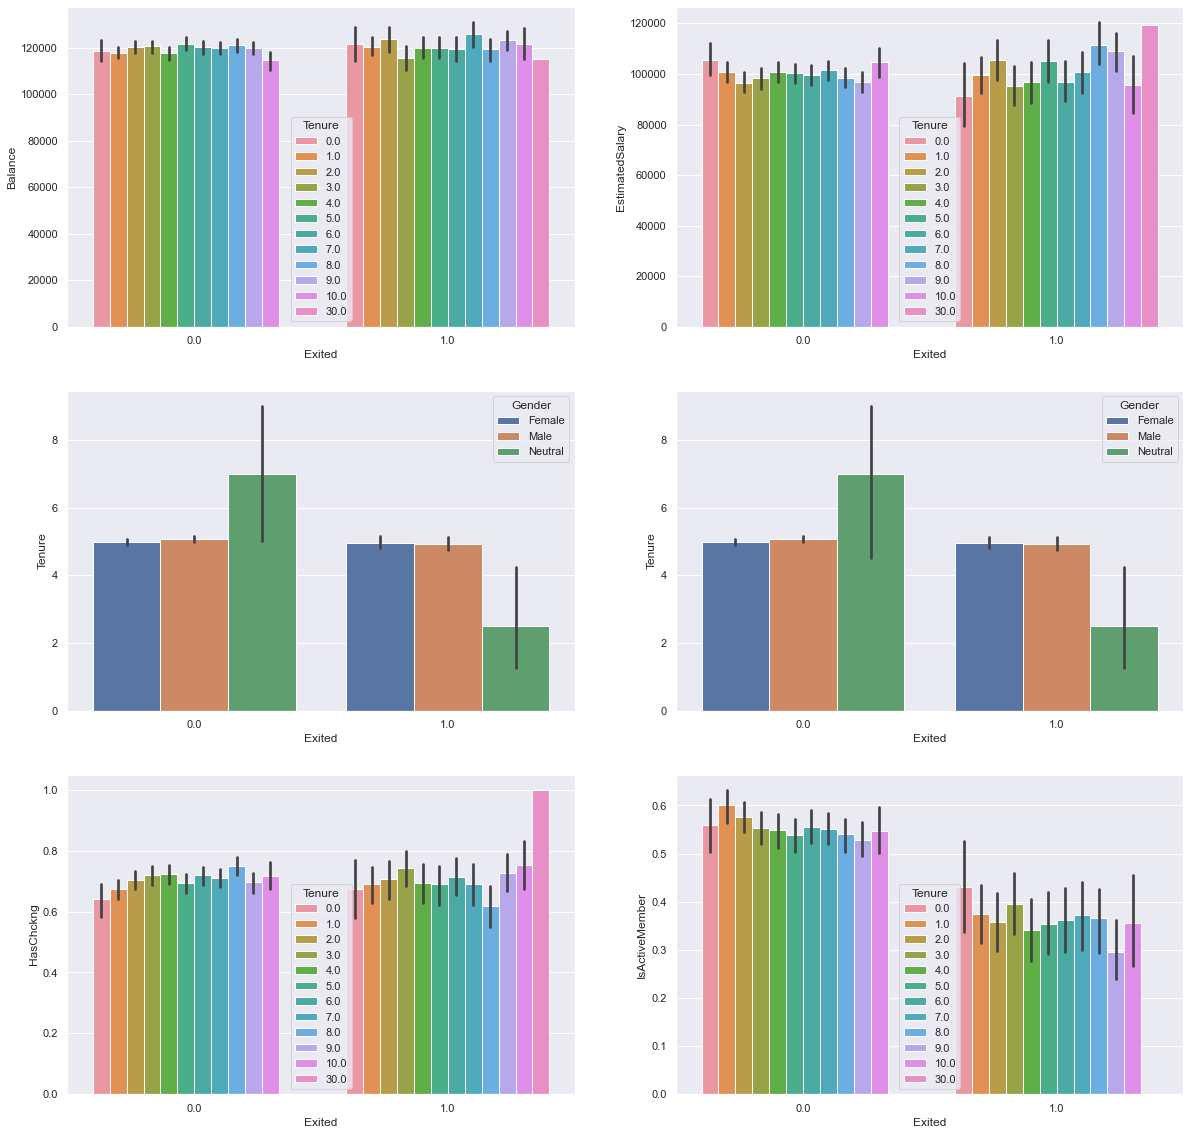

In [21]:
#Plotting the different bar charts to analyze data

fig, ax = plt.subplots(3, 2, figsize = (20, 20))
sns.barplot(x="Exited", y="Balance",hue="Tenure", data=df,ax = ax[0][0])
sns.barplot(x="Exited", y="EstimatedSalary",hue="Tenure", data=df,ax = ax[0][1])
sns.barplot(x="Exited", y="Tenure",hue="Gender", data=df,ax = ax[1][0])
sns.barplot(x="Exited", y="Tenure",hue="Gender", data=df,ax = ax[1][1])
sns.barplot(x="Exited", y="HasChckng",hue="Tenure", data=df,ax = ax[2][0])
sns.barplot(x="Exited", y="IsActiveMember",hue="Tenure", data=df,ax = ax[2][1])

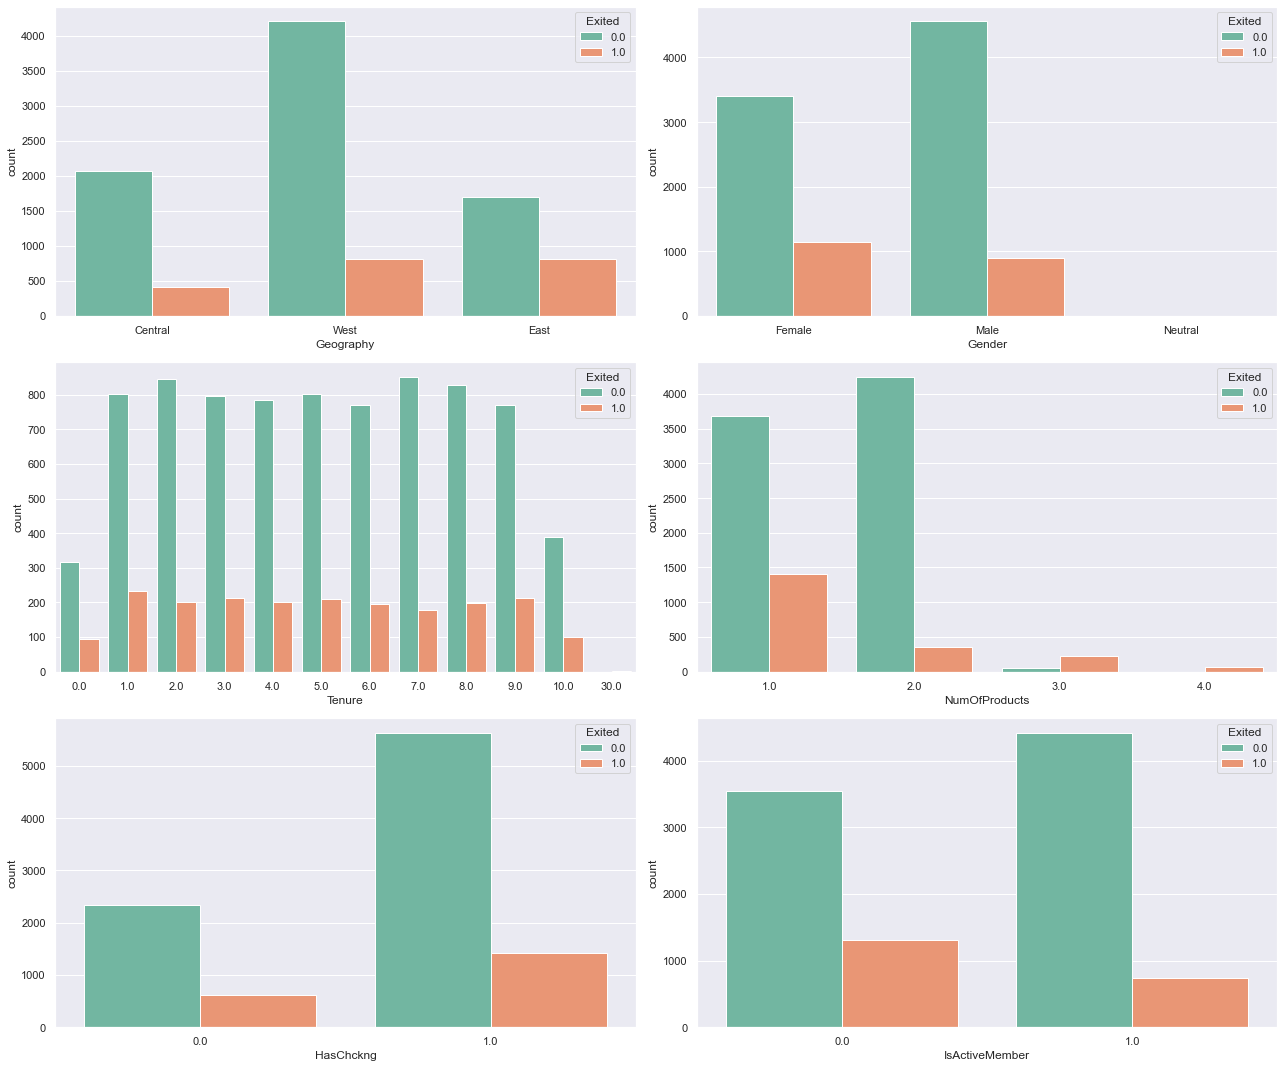

In [22]:
# Analysing categorical variables to see the trend of customers got churned

fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot('Geography', hue = 'Exited', data = df, ax = ax[0][0],palette="Set2")
sns.countplot('Gender', hue = 'Exited', data = df, ax = ax[0][1],palette="Set2")
sns.countplot('Tenure', hue = 'Exited', data = df, ax = ax[1][0],palette="Set2")
sns.countplot('NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1],palette="Set2")
sns.countplot('HasChckng', hue = 'Exited', data = df, ax = ax[2][0],palette="Set2")
sns.countplot('IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1],palette="Set2")

plt.tight_layout()
plt.show()

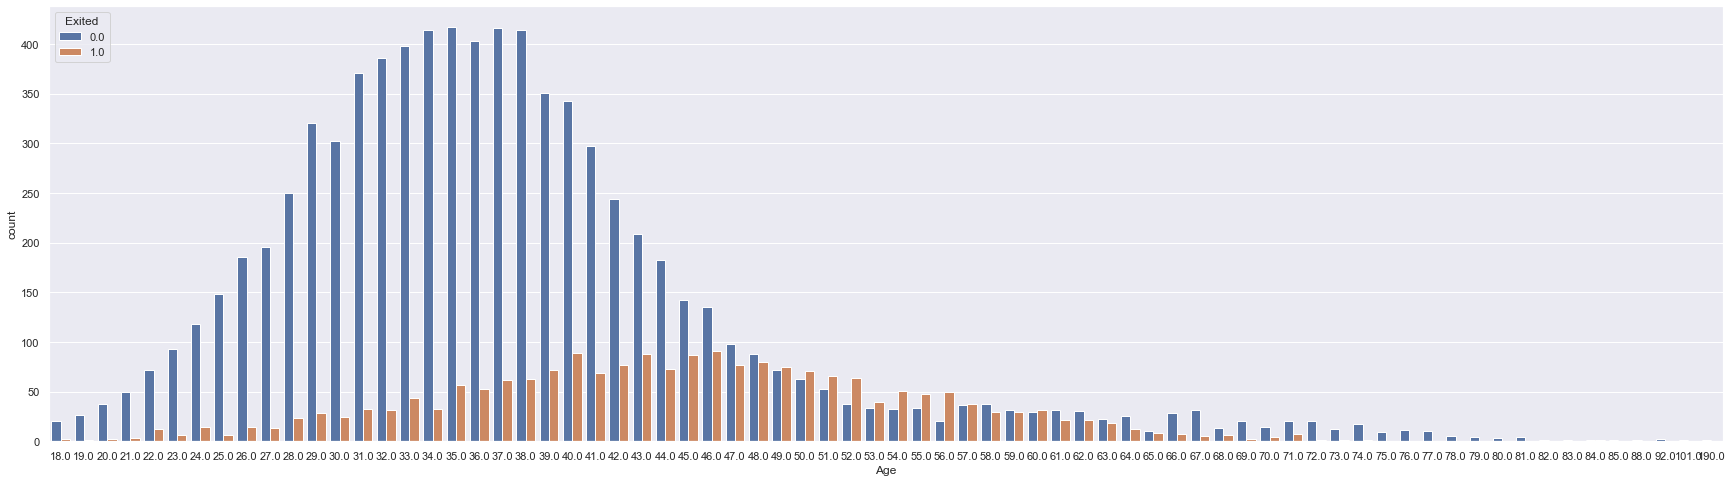

In [23]:
plt.figure(figsize = (30, 8))
sns.countplot(x="Age",data=df, hue="Exited")
plt.show()

### Bonus Contents wrt to Advance analytics

In [24]:
# lets remove the columns from dataframe which are just identifiers (non-essential columns)
df1=df.drop(['CustomerId','Surname'],axis=1)

In [25]:
df1.head()

,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Geography,Gender,Age,Exited
0,1.0,0.0,0.0,9.0,698.0,161993.89,90212.38,Central,Female,39.0,0.0
1,1.0,1.0,1.0,1.0,612.0,NaN,83256.26,Central,Male,35.0,1.0
2,2.0,0.0,1.0,1.0,601.0,64430.06,96517.97,West,Male,47.0,0.0
3,1.0,1.0,0.0,6.0,627.0,57809.32,188258.49,East,Female,30.0,0.0
4,1.0,1.0,0.0,10.0,745.0,96048.55,74510.65,East,Male,48.0,0.0


Using One Hot Encoding For Geography and Gender feature

In [26]:
# importing one hot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df1[['Geography','Gender']]).toarray())

df2 = df1.join(enc_df)
df2.head()

,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Geography,Gender,Age,Exited,0,1,2,3,4,5
0,1.0,0.0,0.0,9.0,698.0,161993.89,90212.38,Central,Female,39.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,612.0,NaN,83256.26,Central,Male,35.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2.0,0.0,1.0,1.0,601.0,64430.06,96517.97,West,Male,47.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,0.0,6.0,627.0,57809.32,188258.49,East,Female,30.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,10.0,745.0,96048.55,74510.65,East,Male,48.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [27]:
dummies1 = pd.get_dummies(df.Geography)
dummies1.head(5)

,Central,East,West
0,1,0,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0


In [28]:
dummies2 = pd.get_dummies(df.Gender)
dummies2.head(5)

,Female,Male,Neutral
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [29]:
#Merging dummies dataframes with main dataframe to get categorical features for Gender and Geography

df_input = pd.concat([df1,dummies1,dummies2],axis='columns')
df_input.head()

,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Geography,Gender,Age,Exited,Central,East,West,Female,Male,Neutral
0,1.0,0.0,0.0,9.0,698.0,161993.89,90212.38,Central,Female,39.0,0.0,1,0,0,1,0,0
1,1.0,1.0,1.0,1.0,612.0,NaN,83256.26,Central,Male,35.0,1.0,1,0,0,0,1,0
2,2.0,0.0,1.0,1.0,601.0,64430.06,96517.97,West,Male,47.0,0.0,0,0,1,0,1,0
3,1.0,1.0,0.0,6.0,627.0,57809.32,188258.49,East,Female,30.0,0.0,0,1,0,1,0,0
4,1.0,1.0,0.0,10.0,745.0,96048.55,74510.65,East,Male,48.0,0.0,0,1,0,0,1,0


In [30]:
# Removing the dependent variable from dataframe/ creating the independent dataframes which will be input to model

X=df_input.drop('Exited',axis='columns')
X.head(5)

,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Geography,Gender,Age,Central,East,West,Female,Male,Neutral
0,1.0,0.0,0.0,9.0,698.0,161993.89,90212.38,Central,Female,39.0,1,0,0,1,0,0
1,1.0,1.0,1.0,1.0,612.0,NaN,83256.26,Central,Male,35.0,1,0,0,0,1,0
2,2.0,0.0,1.0,1.0,601.0,64430.06,96517.97,West,Male,47.0,0,0,1,0,1,0
3,1.0,1.0,0.0,6.0,627.0,57809.32,188258.49,East,Female,30.0,0,1,0,1,0,0
4,1.0,1.0,0.0,10.0,745.0,96048.55,74510.65,East,Male,48.0,0,1,0,0,1,0


In [31]:
X.shape

(10000, 16)